Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

Confusion Matrix:
 [[1 0]
 [0 2]]


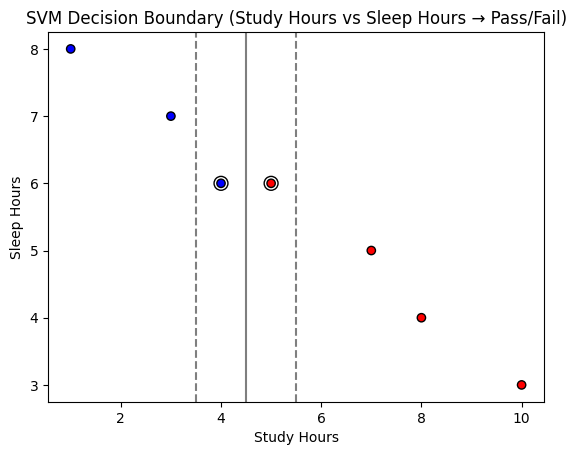

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X = np.array([
    [1, 8], [2, 7], [3, 7], [4, 6], [5, 6],
    [6, 5], [7, 5], [8, 4], [9, 4], [10, 3]
])

y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

model = SVC(kernel='linear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

def plot_hyperplane(X, y, model):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1])
    yy = np.linspace(ylim[0], ylim[1])
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    support_vectors = model.support_vectors_
    ax.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.title('SVM Decision Boundary (Study Hours vs Sleep Hours → Pass/Fail)')
    plt.xlabel("Study Hours")
    plt.ylabel("Sleep Hours")
    plt.show()

plot_hyperplane(X_train,y_train,model)